In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
TEST_IMAGE = 'E:/Official purpose/2021/Sprint - 26/Crop images/ricebug_download3.jpg'
CLASSES = ['Blast', 'FalseSmut', 'RiceBug', 'SheathRot', 'StemBorer', 'unrelated_image']
COLORS = np.random.uniform(0, 255, size=(len(CLASSES), 3))
modelNet = cv2.dnn.readNet(model='simple_frozen_graph.pb',
                           framework='TensorFlow')
test_image = cv2.imread(TEST_IMAGE)
h, w, _ = test_image.shape
blob = cv2.dnn.blobFromImage(test_image, scalefactor=0.01, size=(299, 299), mean=(104, 117, 123), swapRB=True)
modelNet.setInput(blob)
detections = modelNet.forward()
final_outputs = detections[0]
final_outputs = final_outputs.reshape(6, 1)
label_id = np.argmax(final_outputs)
probs = np.exp(final_outputs) / np.sum(np.exp(final_outputs))
final_prob = np.max(probs)*100
out_name = CLASSES[label_id]
print(out_name)
out_text = f"{out_name}, {final_prob:.3f}"
startX = detections[:, 1] * w
startY = detections[:, 2] * h
endX = detections[:, 3] * w
endY = detections[:, 4] * h
cv2.rectangle(test_image, (int(startX), int(startY)), (int(endX), int(endY)), COLORS[label_id], 2)
cv2.putText(test_image, out_name, (int(startX), int(startY-5)), cv2.FONT_HERSHEY_SIMPLEX, 1, COLORS[label_id], 2)
cv2.imshow('Image', test_image)
cv2.waitKey(0)
cv2.imwrite('result.jpg', test_image)

RiceBug


True

RiceBug (1.0)
StemBorer (3.6198e-11)
[[2.3435021e-15 2.2207272e-18 1.0000000e+00 2.4239911e-20 3.6197663e-11
  2.0165206e-31]]
probability:1.0
RiceBug


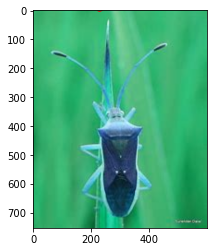

-1

In [17]:
import cv2, imutils
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.inception_v3 import preprocess_input
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
model = load_model('E:/Official purpose/2022/Q3S1/paddy_model_bbox_inception_s14.h5')
TEST_IMAGE = 'E:/Official purpose/2021/Sprint - 26/Crop images/ricebug_download3.jpg'
img=image.load_img(TEST_IMAGE,target_size=(299, 299))
img_arr=image.img_to_array(img)
img_arr
img_arr.shape
img_arr=img_arr/255
img_arr=np.expand_dims(img_arr,axis=0)
#img_data=preprocess_input(img_arr)
pred = model.predict(img_arr)
classes = np.array(['Blast', 'FalseSmut', 'RiceBug', 'SheathRot', 'StemBorer', 'unrelated_image'])
top_2 = np.argsort(pred[0])[:-3:-1]
for i in range(2):
    print("{}".format(classes[top_2[i]])+" ({:.5})".format(pred[0][top_2[i]]))
print(pred)
itemindex = np.where(pred == np.max(pred))
print("probability:" + str(np.max(pred)) + "\n" + classes[itemindex[1][0]])
test_image = cv2.imread(TEST_IMAGE)
test_image = imutils.resize(test_image, width=600)
for box in pred:
    cv2.rectangle(test_image, (int(box[0]), int(box[1])), (int(box[2]), int(box[3])), (0, 255, 0), 2)
    cv2.putText(test_image, classes[itemindex[1][0]], (int(box[0]), int(box[1] - 10)), cv2.FONT_HERSHEY_SIMPLEX, 2, (255, 0, 0), 2)
cv2.imshow("Output", test_image)
plt.imshow(test_image)
plt.show()
cv2.waitKey(0)